# Load Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [143]:
import seaborn as sns
sns.set_style('dark')

In [3]:
from utils import to_img, plot_energy

In [4]:
cat = Image.open('images/cat1.jpeg').convert('L')
cat.save('images/cat1_gray.jpeg')
cat.size

(1350, 900)

In [7]:
plt.rcParams.update({'figure.figsize': (12, 8)})

[[200 200 200 ... 197 197 198]
 [200 200 200 ... 198 198 199]
 [200 200 200 ... 198 198 199]
 ...
 [208 206 204 ... 188 187 178]
 [204 207 205 ... 189 180 173]
 [202 205 204 ... 185 172 174]]


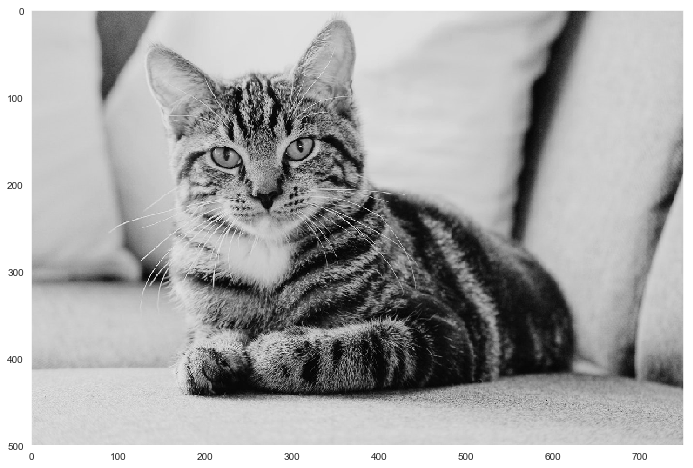

In [8]:
A = np.array(cat.resize([750, 500]))
print(A)
plt.imshow(A, cmap='gray')

[[0.78431373 0.78431373 0.78431373 ... 0.77254902 0.77254902 0.77647059]
 [0.78431373 0.78431373 0.78431373 ... 0.77647059 0.77647059 0.78039216]
 [0.78431373 0.78431373 0.78431373 ... 0.77647059 0.77647059 0.78039216]
 ...
 [0.81568627 0.80784314 0.8        ... 0.7372549  0.73333333 0.69803922]
 [0.8        0.81176471 0.80392157 ... 0.74117647 0.70588235 0.67843137]
 [0.79215686 0.80392157 0.8        ... 0.7254902  0.6745098  0.68235294]]


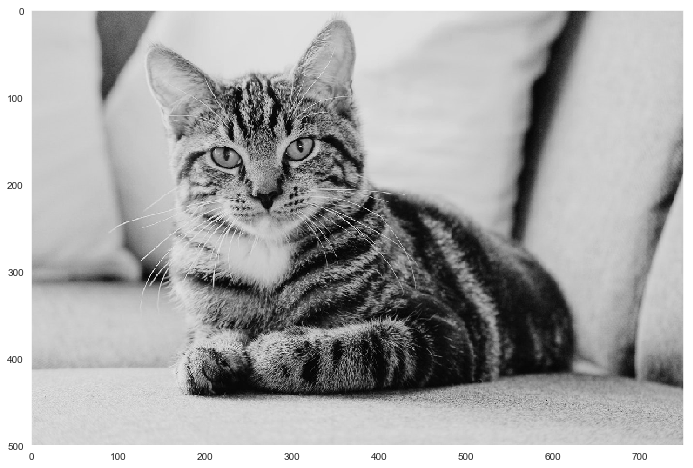

In [9]:
B = A/255
print(B)
plt.imshow(B, cmap='gray')
to_img(B).save('images/cat1_small.jpeg')

# Inpainting

## Mask

In [74]:
%run inpainting.py

In [30]:
import importlib
importlib.reload(proximal)
importlib.reload(fista)

<module 'fista' from '/media/yu-guan/DATA/works/ens/MVA/Courses/DataScience/project/src/fista.py'>

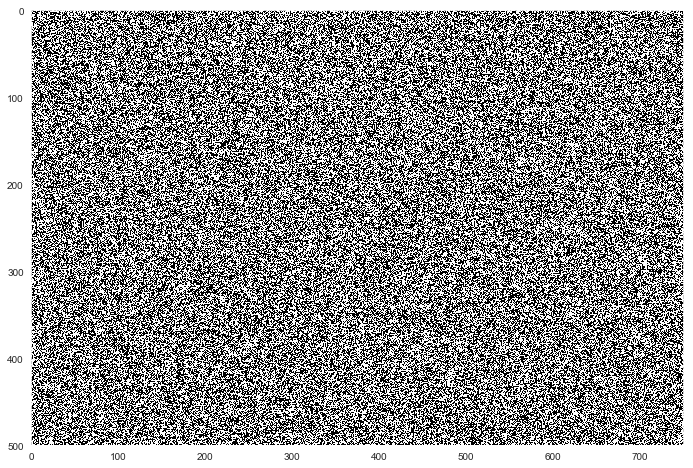

In [75]:
M = generate_mask(B.shape)
plt.imshow(M, cmap='gray')

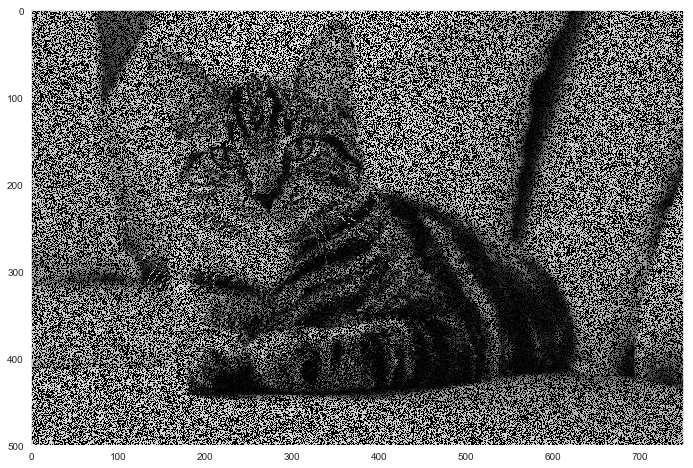

In [76]:
Bm = M * B
plt.imshow(Bm, cmap='gray')

In [14]:
cat_masked = to_img(Bm)
cat_masked.save('images/cat1_masked.jpeg')

## FB

In [17]:
inp_fb = Inpainting(Bm, M)

In [18]:
inp_fb.run(100, 0.1, 0.02, 'db4')

tensor([[0.7683, 0.7658, 0.7577,  ..., 0.2863, 0.2948, 0.7971],
        [0.7952, 0.7526, 0.6420,  ..., 0.6899, 0.5619, 0.7818],
        [0.7649, 0.7680, 0.7735,  ..., 0.7636, 0.7582, 0.3071],
        ...,
        [0.6803, 0.5468, 0.7797,  ..., 0.3250, 0.5047, 0.3731],
        [0.7923, 0.8014, 0.6674,  ..., 0.7478, 0.7682, 0.6597],
        [0.5488, 0.5613, 0.6854,  ..., 0.6012, 0.0799, 0.6826]],
       device='cuda:0', requires_grad=True)

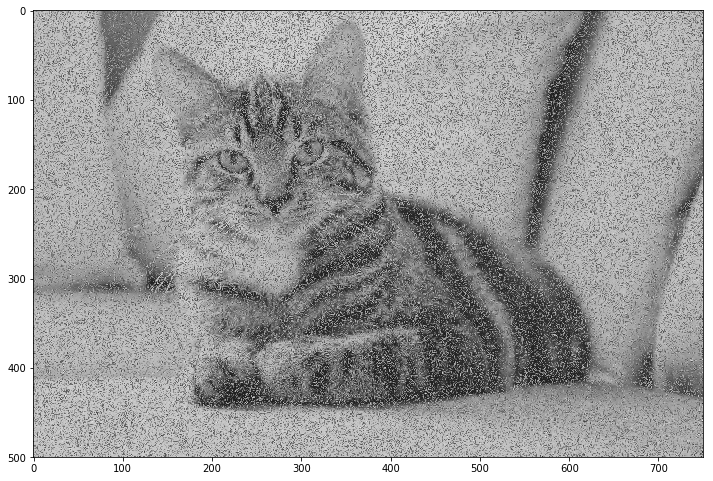

In [19]:
plt.figure(figsize=(12, 8))
plt.imshow(inp_fb.x.cpu().detach(), cmap='gray')

## FISTA

In [37]:
alpha_c = fista.AlphaClassic()
alpha2 = fista.Alpha(2)
alpha3 = fista.Alpha(3)
alpha4 = fista.Alpha(4)

In [79]:
inp_fista = Inpainting(Bm, M)
inp_fista.run(100, 0.1, 0.02, 'db4', alpha=alpha_c)

tensor([[0.7851, 0.7851, 0.7851,  ..., 0.7799, 0.7826, 0.7893],
        [0.7851, 0.7851, 0.7851,  ..., 0.7879, 0.7886, 0.7792],
        [0.7851, 0.7851, 0.7852,  ..., 0.7903, 0.7948, 0.7917],
        ...,
        [0.8018, 0.8017, 0.8017,  ..., 0.7423, 0.8077, 0.9553],
        [0.8015, 0.8007, 0.8015,  ..., 0.7416, 0.8004, 0.9912],
        [0.8012, 0.7992, 0.8018,  ..., 0.7234, 0.6970, 0.6379]],
       device='cuda:0', requires_grad=True)

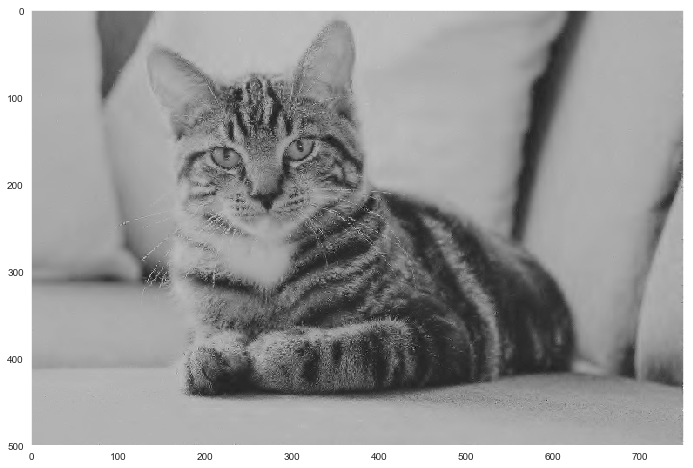

In [80]:
plt.figure(figsize=(12, 8))
plt.imshow(inp_fista.x.cpu().detach(), cmap='gray')

In [58]:
inp_fista_a2 = Inpainting(Bm, M)
inp_fista_a2.run(100, 0.1, 0.02, 'db4', alpha=alpha2)

tensor([[0.7842, 0.7842, 0.7842,  ..., 0.8244, 0.8000, 0.7827],
        [0.7842, 0.7842, 0.7842,  ..., 0.7786, 0.7751, 0.7728],
        [0.7843, 0.7843, 0.7843,  ..., 0.7826, 0.7680, 0.6644],
        ...,
        [0.8011, 0.8009, 0.8007,  ..., 0.7571, 0.7421, 0.7055],
        [0.8007, 0.8004, 0.8002,  ..., 0.7154, 0.7054, 0.6957],
        [0.8003, 0.7999, 0.7997,  ..., 0.5562, 0.6205, 0.6939]],
       device='cuda:0', requires_grad=True)

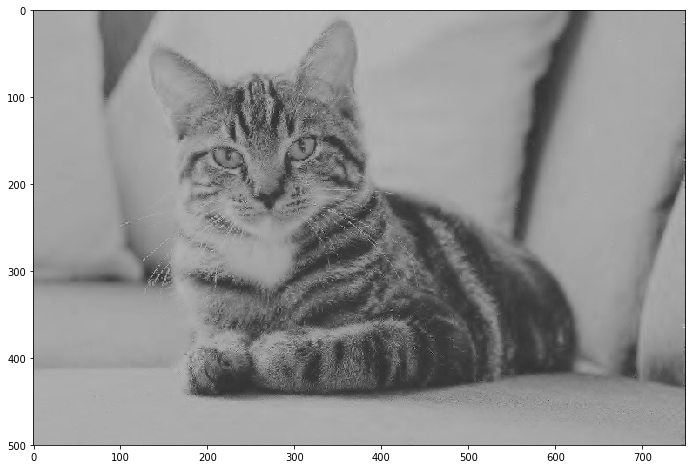

In [59]:
plt.figure(figsize=(12, 8))
plt.imshow(inp_fista_a2.x.cpu().detach(), cmap='gray')

In [52]:
inp_fista_a3 = Inpainting(Bm, M)
inp_fista_a3.run(100, 0.1, 0.02, 'db4', alpha=alpha3)

tensor([[0.7867, 0.7868, 0.7868,  ..., 0.7058, 0.7215, 0.8023],
        [0.7868, 0.7868, 0.7869,  ..., 0.7467, 0.7903, 0.7855],
        [0.7869, 0.7869, 0.7869,  ..., 0.7687, 0.7294, 0.4330],
        ...,
        [0.8000, 0.7999, 0.7999,  ..., 0.7545, 0.7345, 0.7064],
        [0.7997, 0.7995, 0.7996,  ..., 0.7164, 0.7189, 0.6692],
        [0.7996, 0.7993, 0.7995,  ..., 0.5094, 0.6448, 0.6967]],
       device='cuda:0', requires_grad=True)

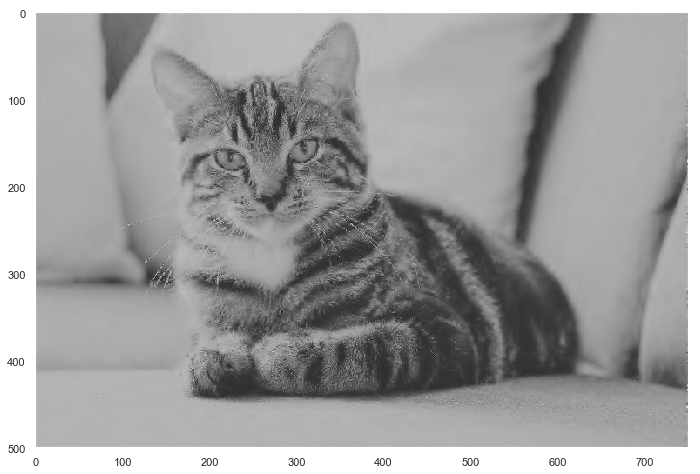

In [83]:
plt.figure(figsize=(12, 8))
plt.imshow(inp_fista_a3.x.cpu().detach(), cmap='gray')

In [61]:
inp_fista_a4 = Inpainting(Bm, M)
inp_fista_a4.run(100, 0.1, 0.02, 'db4', alpha=alpha4)

tensor([[0.7917, 0.7917, 0.7918,  ..., 0.7689, 0.7716, 0.7836],
        [0.7919, 0.7919, 0.7919,  ..., 0.7682, 0.7652, 0.7618],
        [0.7920, 0.7920, 0.7920,  ..., 0.7684, 0.7645, 0.7585],
        ...,
        [0.8019, 0.8017, 0.8043,  ..., 0.7492, 0.7288, 0.6988],
        [0.8032, 0.8030, 0.8044,  ..., 0.7161, 0.7090, 0.6920],
        [0.8086, 0.8084, 0.8061,  ..., 0.6028, 0.6534, 0.6900]],
       device='cuda:0', requires_grad=True)

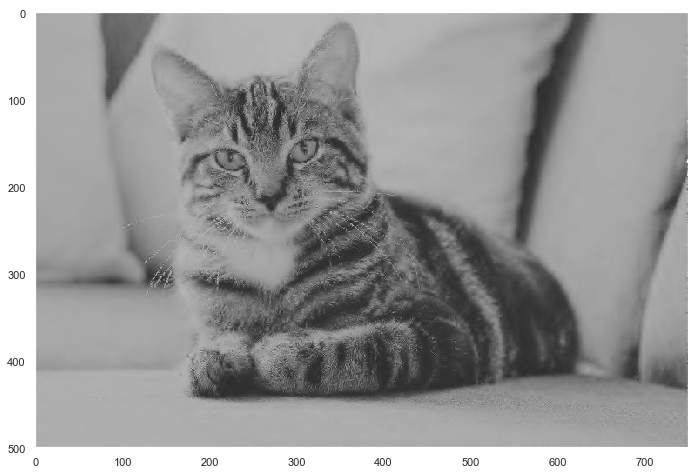

In [80]:
plt.figure(figsize=(12, 8))
plt.imshow(inp_fista_a4.x.cpu().detach(), cmap='gray')

## Comparison

In [106]:
sns.set()
sns.set(font_scale=1.6)
# plt.rcParams.update({'figure.figsize': (8, 6)})
# plt.rcParams.update({'font.size': 16})

In [128]:
min_energy = np.min(
    np.r_[inp_fb.energies, inp_fista.energies, inp_fista_a2.
          energies, inp_fista_a3.energies, inp_fista_a4.energies])
print(min_energy)

388.6807078552246


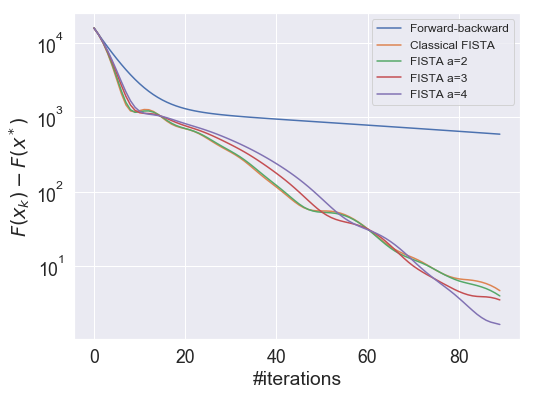

In [132]:
plot_energy(inp_fb.energies, min_energy, 90, label='Forward-backward')
plot_energy(inp_fista.energies, min_energy, 90, label='Classical FISTA')
plot_energy(inp_fista_a2.energies, min_energy, 90, label='FISTA a=2')
plot_energy(inp_fista_a3.energies, min_energy, 90, label='FISTA a=3')
plot_energy(inp_fista_a4.energies, min_energy, 90, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$F(x_k)-F(x^*)$')
plt.yscale('log')
plt.legend(prop={'size': 12})

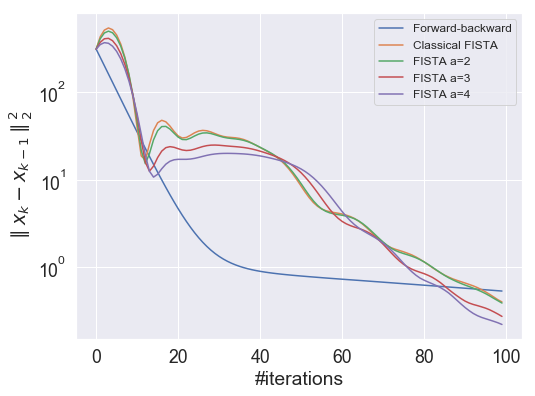

In [134]:
plt.plot(inp_fb.x_diffs[:100], label='Forward-backward')
plt.plot(inp_fista.x_diffs, label='Classical FISTA')
plt.plot(inp_fista_a2.x_diffs, label='FISTA a=2')
plt.plot(inp_fista_a3.x_diffs, label='FISTA a=3')
plt.plot(inp_fista_a4.x_diffs, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$\parallel x_k-x_{k-1}\parallel_2^2$')
plt.yscale('log')
plt.legend(prop={'size': 12})

In [113]:
to_img(inp_fb.x.cpu().detach().numpy()).save('images/cat1_inpainting_fb_100.jpeg')
to_img(inp_fista.x.cpu().detach().numpy()).save('images/cat1_inpainting_fista.jpeg')

In [117]:
inp_fb.run(100, 0.1, 0.02, 'db4')
to_img(inp_fb.x.cpu().detach().numpy()).save('images/cat1_inpainting_fb_500.jpeg')

# Deblurring

## Blurring

In [10]:
%run deblurring.py

In [15]:
import importlib
importlib.reload(proximal)
importlib.reload(fista)

<module 'fista' from '/media/yu-guan/DATA/works/ens/MVA/Courses/DataScience/project/src/fista.py'>

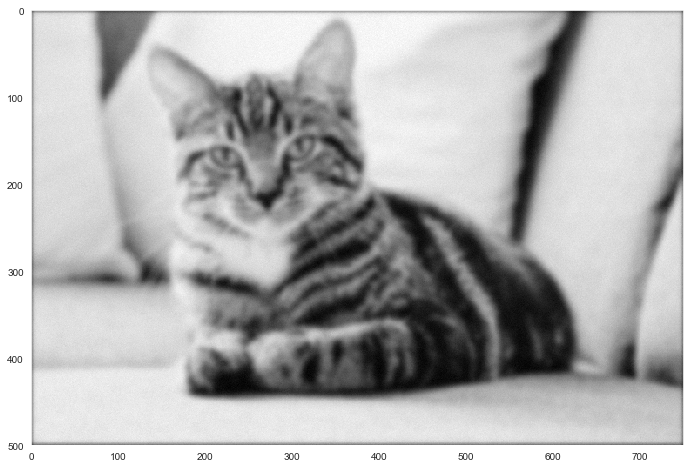

In [11]:
blurring = GaussianSmoothing(19, 3)
Bb = blurring(torch.tensor(B, dtype=torch.float))
Bbn = Bb.numpy() + np.random.randn(*B.shape)*0.01
plt.imshow(Bbn, cmap='gray')

In [13]:
cat_blurred = to_img(Bbn)
cat_blurred.save('images/cat1_blurred.jpeg')

## FB

In [71]:
deblurring_fb = Deblurring(Bbn, 19, 3)

In [122]:
deblurring_fb.run(100, 1, 0.005, 'db6')

tensor([[0.7850, 0.7786, 0.7748,  ..., 0.7699, 0.7691, 0.7684],
        [0.7844, 0.7813, 0.7797,  ..., 0.7701, 0.7694, 0.7686],
        [0.7833, 0.7856, 0.7871,  ..., 0.7704, 0.7697, 0.7689],
        ...,
        [0.7282, 0.7699, 0.8293,  ..., 0.7188, 0.7173, 0.7163],
        [0.8077, 0.8099, 0.8115,  ..., 0.7282, 0.7288, 0.7290],
        [0.7630, 0.7913, 0.8314,  ..., 0.7351, 0.7370, 0.7380]],
       device='cuda:0', requires_grad=True)

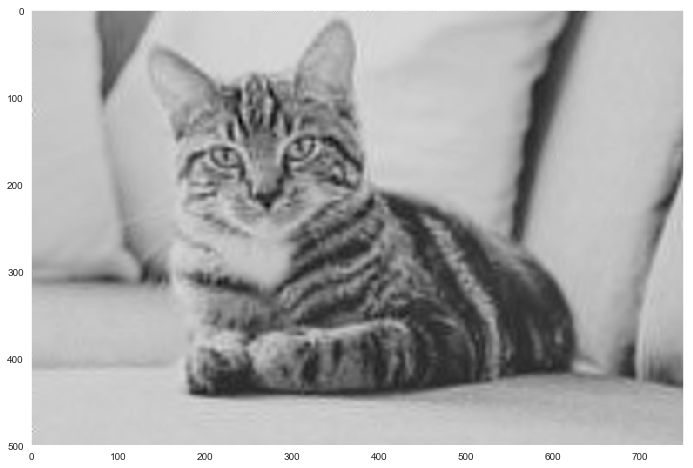

In [123]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fb.x.cpu().detach(), cmap='gray')

## FISTA

In [83]:
alpha_c = fista.AlphaClassic()
alpha2 = fista.Alpha(2)
alpha3 = fista.Alpha(3)
alpha4 = fista.Alpha(4)

In [120]:
deblurring_fista = Deblurring(Bbn, 19, 3)
deblurring_fista.run(100, 1, 0.005, 'db6', alpha=alpha_c)

tensor([[0.7823, 0.7925, 0.8010,  ..., 0.7286, 0.7575, 0.7839],
        [0.7722, 0.7827, 0.7957,  ..., 0.7484, 0.7617, 0.7738],
        [0.7648, 0.7720, 0.7851,  ..., 0.7797, 0.7684, 0.7581],
        ...,
        [0.6557, 0.7284, 0.8425,  ..., 0.7169, 0.7146, 0.7131],
        [0.9296, 0.8614, 0.7540,  ..., 0.7267, 0.7253, 0.7243],
        [0.7281, 0.7640, 0.8208,  ..., 0.7339, 0.7330, 0.7323]],
       device='cuda:0', requires_grad=True)

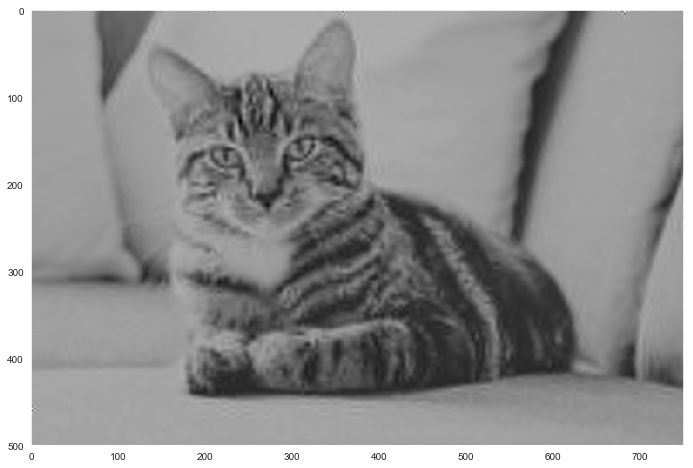

In [121]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fista.x.cpu().detach(), cmap='gray')

In [118]:
deblurring_fista_a2 = Deblurring(Bbn, 19, 3)
deblurring_fista_a2.run(100, 1, 0.005, 'db6', alpha=alpha2)

tensor([[0.9494, 0.3124, 1.0271,  ..., 0.9048, 0.6423, 0.8343],
        [0.9018, 0.5783, 0.9075,  ..., 0.8354, 0.7082, 0.8008],
        [0.8128, 0.9944, 0.7139,  ..., 0.7267, 0.8115, 0.7477],
        ...,
        [0.7962, 0.7964, 0.7967,  ..., 0.7153, 0.7124, 0.7105],
        [0.7973, 0.7976, 0.7979,  ..., 0.7247, 0.7226, 0.7212],
        [0.7983, 0.7986, 0.7989,  ..., 0.7315, 0.7298, 0.7287]],
       device='cuda:0', requires_grad=True)

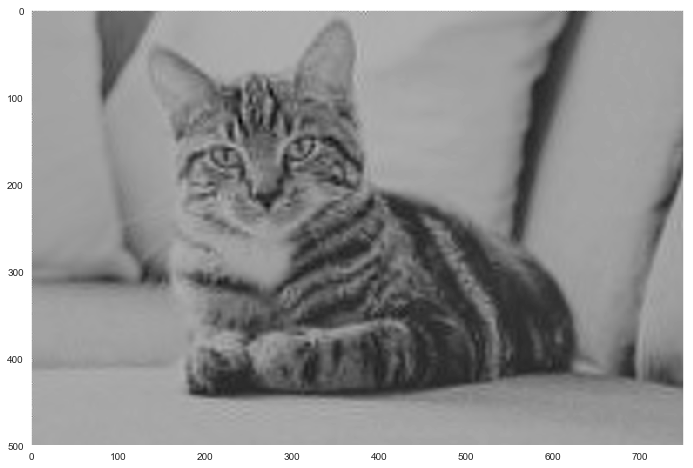

In [119]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fista_a2.x.cpu().detach(), cmap='gray')

In [116]:
deblurring_fista_a3 = Deblurring(Bbn, 19, 3)
deblurring_fista_a3.run(100, 1, 0.005, 'db6', alpha=alpha3)

tensor([[0.7996, 0.7442, 0.7106,  ..., 0.7698, 0.7690, 0.7683],
        [0.8162, 0.7765, 0.7415,  ..., 0.7700, 0.7693, 0.7685],
        [0.8236, 0.8188, 0.7944,  ..., 0.7703, 0.7696, 0.7688],
        ...,
        [0.7557, 0.7767, 0.8097,  ..., 0.7164, 0.7141, 0.7125],
        [0.7888, 0.7930, 0.7994,  ..., 0.7259, 0.7247, 0.7239],
        [0.8208, 0.8085, 0.7895,  ..., 0.7327, 0.7323, 0.7319]],
       device='cuda:0', requires_grad=True)

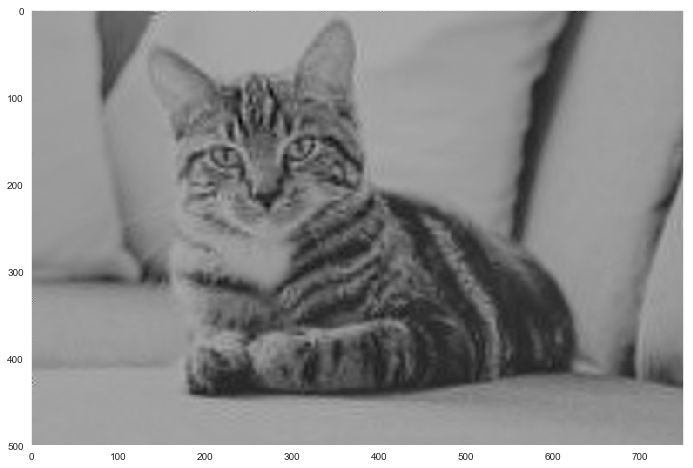

In [117]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fista_a3.x.cpu().detach(), cmap='gray')

In [114]:
deblurring_fista_a4 = Deblurring(Bbn, 19, 3)
deblurring_fista_a4.run(100, 1, 0.005, 'db6', alpha=alpha4)

tensor([[0.9853, 0.2850, 1.0955,  ..., 0.7698, 0.7690, 0.7683],
        [0.9483, 0.5719, 0.9156,  ..., 0.7700, 0.7693, 0.7685],
        [0.8054, 0.9897, 0.6523,  ..., 0.7703, 0.7696, 0.7688],
        ...,
        [0.7974, 0.7976, 0.7978,  ..., 0.7175, 0.7155, 0.7142],
        [0.7984, 0.7986, 0.7988,  ..., 0.7278, 0.7268, 0.7261],
        [0.7992, 0.7994, 0.7997,  ..., 0.7352, 0.7348, 0.7345]],
       device='cuda:0', requires_grad=True)

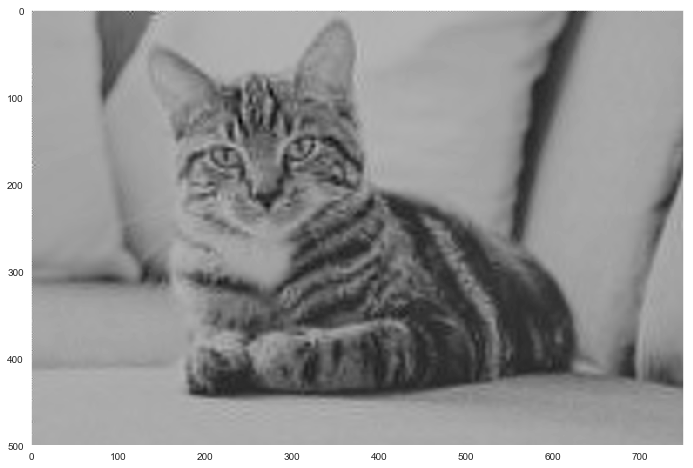

In [115]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fista_a4.x.cpu().detach(), cmap='gray')

## Comparison

In [136]:
sns.set()
sns.set(font_scale=1.6)
# plt.rcParams.update({'figure.figsize': (8, 6)})
# plt.rcParams.update({'font.size': 16})

In [128]:
min_energy = np.min(
    np.r_[deblurring_fb.energies, deblurring_fista.
          energies, deblurring_fista_a2.energies, deblurring_fista_a3.
          energies, deblurring_fista_a4.energies])
print(min_energy)

135.84942301750183


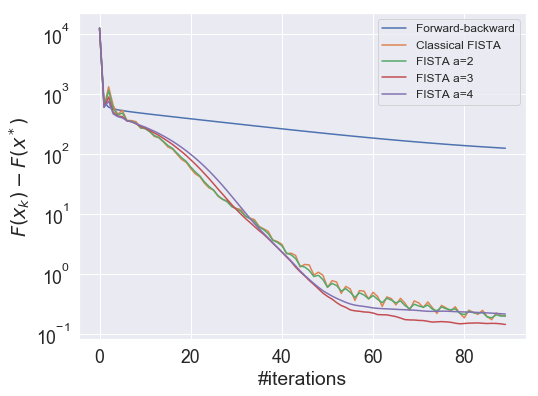

In [139]:
plt.figure(figsize=(8, 6))
plot_energy(deblurring_fb.energies, min_energy, 90, label='Forward-backward')
plot_energy(deblurring_fista.energies, min_energy, 90, label='Classical FISTA')
plot_energy(deblurring_fista_a2.energies, min_energy, 90, label='FISTA a=2')
plot_energy(deblurring_fista_a3.energies, min_energy, 90, label='FISTA a=3')
plot_energy(deblurring_fista_a4.energies, min_energy, 90, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$F(x_k)-F(x^*)$')
plt.yscale('log')
plt.legend(prop={'size': 12})

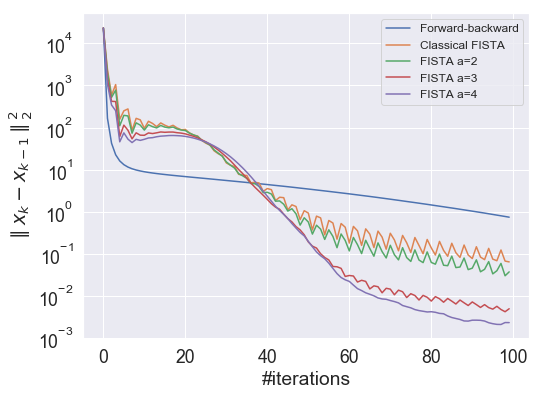

In [140]:
plt.figure(figsize=(8, 6))
plt.plot(deblurring_fb.x_diffs[:100], label='Forward-backward')
plt.plot(deblurring_fista.x_diffs, label='Classical FISTA')
plt.plot(deblurring_fista_a2.x_diffs, label='FISTA a=2')
plt.plot(deblurring_fista_a3.x_diffs, label='FISTA a=3')
plt.plot(deblurring_fista_a4.x_diffs, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$\parallel x_k-x_{k-1}\parallel_2^2$')
plt.yscale('log')
plt.legend(prop={'size': 12})

In [131]:
to_img(deblurring_fb.x.cpu().detach().numpy()).save('images/cat1_deblurring_fb_100.jpeg')
to_img(deblurring_fista.x.cpu().detach().numpy()).save('images/cat1_deblurring_fista.jpeg')

# TV Denoising

## Add noise

In [141]:
%run tv_denoising.py

In [15]:
import importlib
importlib.reload(proximal)
importlib.reload(fista)

<module 'fista' from '/media/yu-guan/DATA/works/ens/MVA/Courses/DataScience/project/src/fista.py'>

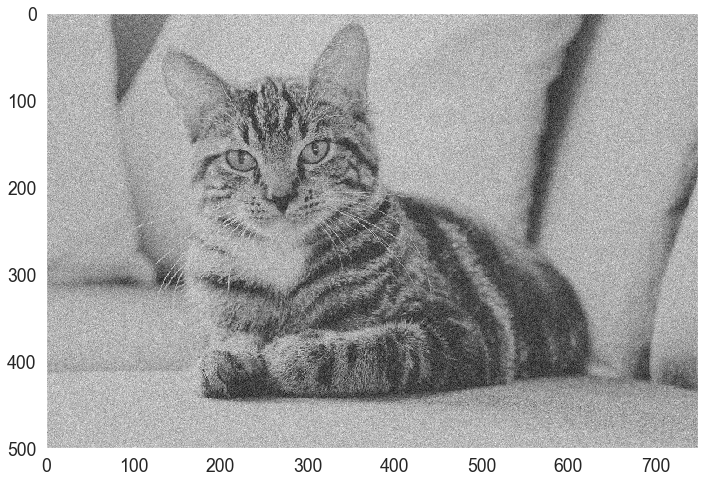

In [144]:
Bn = B + np.random.randn(*B.shape)*0.1
plt.imshow(Bn, cmap='gray')

In [145]:
cat_blurred = to_img(Bn)
cat_blurred.save('images/cat1_noisy.jpeg')

## FB

In [206]:
denoising_fb = TVDenoising(Bn)
denoising_fb.run(100, 0.1, 0.1)

tensor([[0.8036, 0.8028, 0.8013,  ..., 0.7640, 0.7612, 0.7201],
        [0.8039, 0.8031, 0.8011,  ..., 0.7595, 0.7580, 0.7201],
        [0.8045, 0.8041, 0.8002,  ..., 0.7569, 0.7541, 0.7458],
        ...,
        [0.7714, 0.7710, 0.7705,  ..., 0.6788, 0.6780, 0.6744],
        [0.7671, 0.7669, 0.7673,  ..., 0.6290, 0.6259, 0.6244],
        [0.7645, 0.7635, 0.7606,  ..., 0.6312, 0.6250, 0.6144]],
       device='cuda:0', grad_fn=<AddBackward0>)

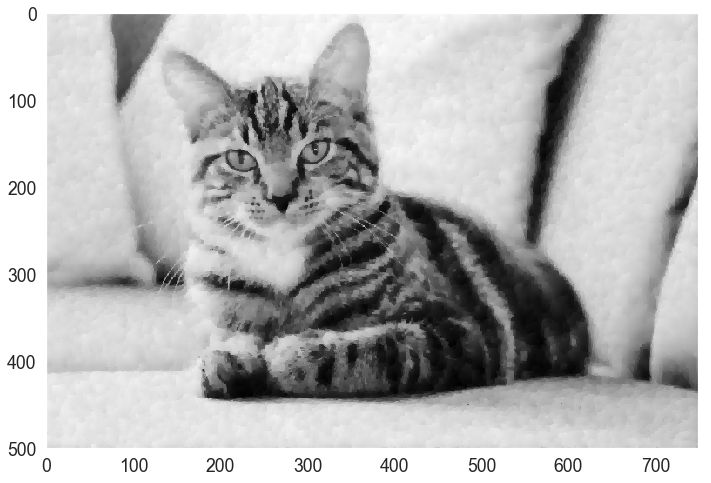

In [207]:
plt.figure(figsize=(12, 8))
plt.imshow(denoising_fb.x.cpu().detach(), cmap='gray')

## FISTA

In [83]:
alpha_c = fista.AlphaClassic()
alpha2 = fista.Alpha(2)
alpha3 = fista.Alpha(3)
alpha4 = fista.Alpha(4)

In [220]:
denoising_fista = TVDenoising(Bn)
denoising_fista.run(100, 0.1, 0.1, alpha=alpha_c)

tensor([[0.7865, 0.7874, 0.7874,  ..., 0.7740, 0.7728, 0.7200],
        [0.7874, 0.7870, 0.7872,  ..., 0.7734, 0.7725, 0.7203],
        [0.7868, 0.7874, 0.7864,  ..., 0.7712, 0.7663, 0.7521],
        ...,
        [0.7735, 0.7717, 0.7719,  ..., 0.6988, 0.6967, 0.6922],
        [0.7725, 0.7730, 0.7737,  ..., 0.6268, 0.6287, 0.6261],
        [0.7729, 0.7733, 0.7729,  ..., 0.6274, 0.6266, 0.6144]],
       device='cuda:0', grad_fn=<AddBackward0>)

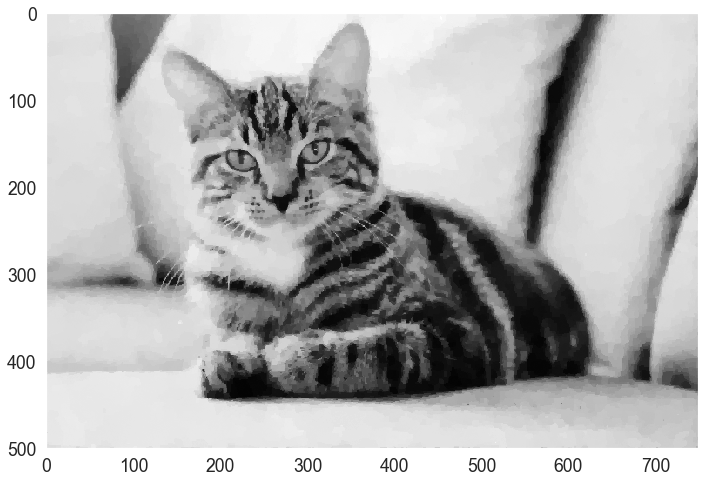

In [221]:
plt.figure(figsize=(12, 8))
plt.imshow(denoising_fista.x.cpu().detach(), cmap='gray')

In [216]:
denoising_fista_a2 = TVDenoising(Bn)
denoising_fista_a2.run(100, 0.1, 0.1, alpha=alpha2)

tensor([[0.7873, 0.7869, 0.7863,  ..., 0.7732, 0.7735, 0.7196],
        [0.7870, 0.7870, 0.7876,  ..., 0.7735, 0.7736, 0.7206],
        [0.7868, 0.7869, 0.7871,  ..., 0.7712, 0.7675, 0.7521],
        ...,
        [0.7729, 0.7739, 0.7739,  ..., 0.6970, 0.6980, 0.6918],
        [0.7737, 0.7729, 0.7732,  ..., 0.6283, 0.6274, 0.6259],
        [0.7731, 0.7728, 0.7727,  ..., 0.6270, 0.6269, 0.6144]],
       device='cuda:0', grad_fn=<AddBackward0>)

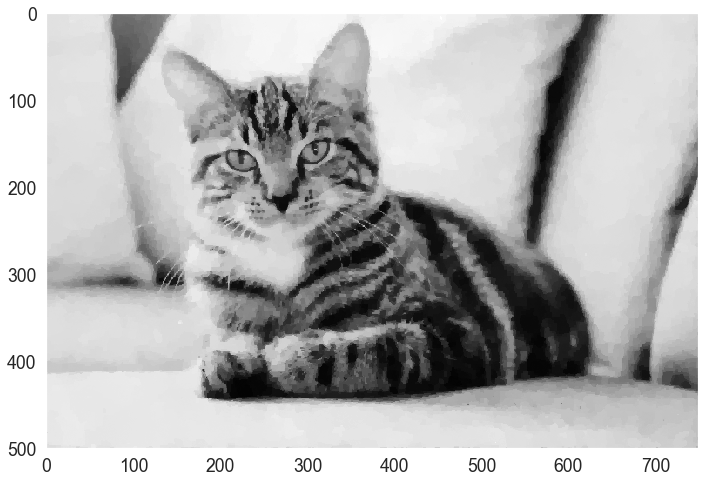

In [217]:
plt.figure(figsize=(12, 8))
plt.imshow(denoising_fista_a2.x.cpu().detach(), cmap='gray')

In [214]:
denoising_fista_a3 = TVDenoising(Bn)
denoising_fista_a3.run(100, 0.1, 0.1, alpha=alpha3)

tensor([[0.7859, 0.7859, 0.7862,  ..., 0.7741, 0.7721, 0.7201],
        [0.7860, 0.7857, 0.7859,  ..., 0.7734, 0.7723, 0.7201],
        [0.7859, 0.7855, 0.7858,  ..., 0.7712, 0.7678, 0.7530],
        ...,
        [0.7734, 0.7736, 0.7732,  ..., 0.6984, 0.6983, 0.6912],
        [0.7735, 0.7727, 0.7728,  ..., 0.6277, 0.6269, 0.6265],
        [0.7723, 0.7724, 0.7725,  ..., 0.6275, 0.6270, 0.6144]],
       device='cuda:0', grad_fn=<AddBackward0>)

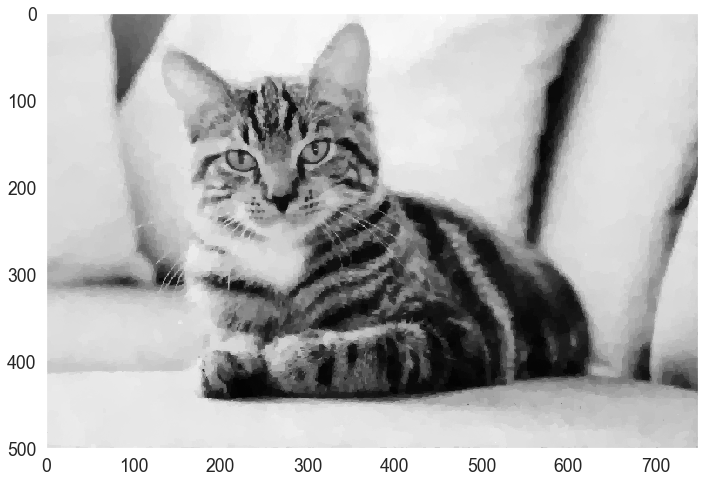

In [215]:
plt.figure(figsize=(12, 8))
plt.imshow(denoising_fista_a3.x.cpu().detach(), cmap='gray')

In [211]:
denoising_fista_a4 = TVDenoising(Bn)
denoising_fista_a4.run(100, 0.1, 0.1, alpha=alpha4)

tensor([[0.7873, 0.7875, 0.7873,  ..., 0.7728, 0.7725, 0.7200],
        [0.7875, 0.7873, 0.7872,  ..., 0.7730, 0.7726, 0.7202],
        [0.7871, 0.7874, 0.7868,  ..., 0.7712, 0.7662, 0.7551],
        ...,
        [0.7729, 0.7729, 0.7728,  ..., 0.6977, 0.6984, 0.6916],
        [0.7728, 0.7728, 0.7726,  ..., 0.6273, 0.6269, 0.6272],
        [0.7728, 0.7730, 0.7728,  ..., 0.6271, 0.6271, 0.6144]],
       device='cuda:0', grad_fn=<AddBackward0>)

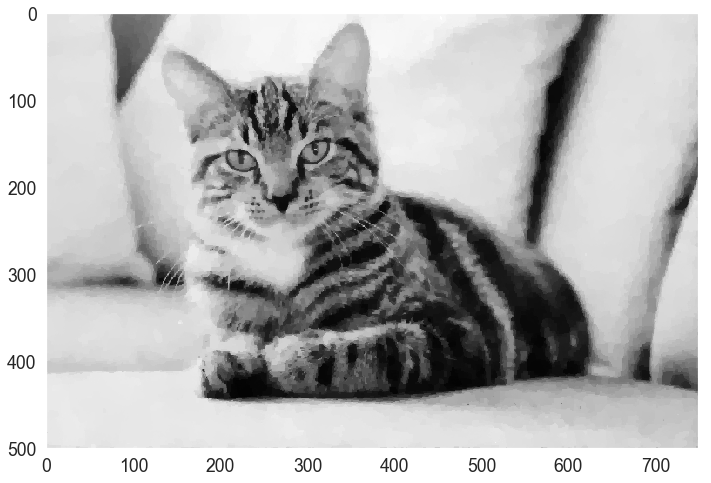

In [212]:
plt.figure(figsize=(12, 8))
plt.imshow(denoising_fista_a4.x.cpu().detach(), cmap='gray')

## Comparison

In [222]:
sns.set()
sns.set(font_scale=1.6)
# plt.rcParams.update({'figure.figsize': (8, 6)})
# plt.rcParams.update({'font.size': 16})

In [223]:
min_energy = np.min(
    np.r_[denoising_fb.energies, denoising_fista.energies, denoising_fista_a2.
          energies, denoising_fista_a3.energies, denoising_fista_a4.energies])
print(min_energy)

78292.28125


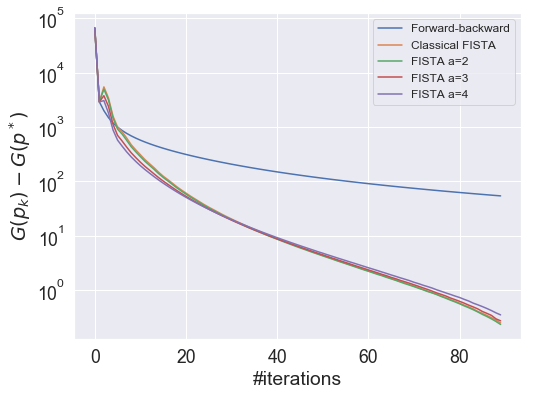

In [234]:
plt.figure(figsize=(8, 6))
plot_energy(denoising_fb.energies, min_energy, 90, label='Forward-backward')
plot_energy(denoising_fista.energies, min_energy, 90, label='Classical FISTA')
plot_energy(denoising_fista_a2.energies, min_energy, 90, label='FISTA a=2')
plot_energy(denoising_fista_a3.energies, min_energy, 90, label='FISTA a=3')
plot_energy(denoising_fista_a4.energies, min_energy, 90, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$G(p_k)-G(p^*)$')
plt.yscale('log')
plt.legend(prop={'size': 12})

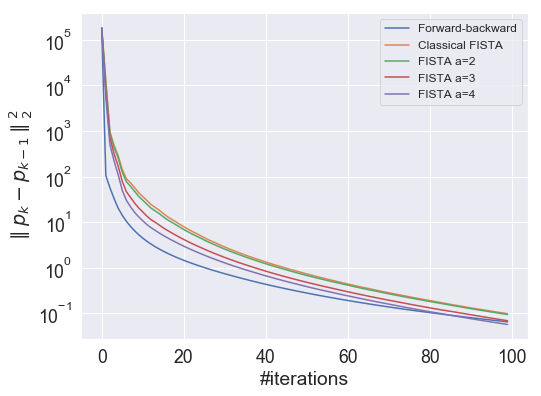

In [228]:
plt.figure(figsize=(8, 6))
plt.plot(denoising_fb.p_diffs[:100], label='Forward-backward')
plt.plot(denoising_fista.p_diffs, label='Classical FISTA')
plt.plot(denoising_fista_a2.p_diffs, label='FISTA a=2')
plt.plot(denoising_fista_a3.p_diffs, label='FISTA a=3')
plt.plot(denoising_fista_a4.p_diffs, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$\parallel p_k-p_{k-1}\parallel_2^2$')
plt.yscale('log')
plt.legend(prop={'size': 12})

In [229]:
to_img(denoising_fb.x.cpu().detach().numpy()).save('images/cat1_denoising_fb_100.jpeg')
to_img(denoising_fista.x.cpu().detach().numpy()).save('images/cat1_denoising_fista.jpeg')

In [233]:
denoising_fb.run(100, 0.1, 0.1)
to_img(denoising_fb.x.cpu().detach().numpy()).save('images/cat1_denoising_fb_500.jpeg')